

# Tarea - Caminata aleatoria y simulación montecarlo
## Jonathan Valencia Guerra                                                                                      01/10/23

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

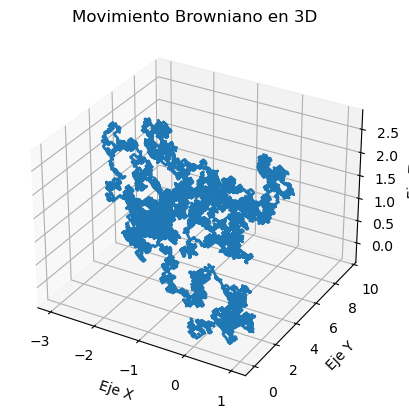

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros de la simulación
tiempo_total = 10  # segundos
delta_t = 0.001  # intervalo de tiempo
num_pasos = int(tiempo_total / delta_t)

# Inicializar las coordenadas
x, y, z = 0, 0, 0
x_vals, y_vals, z_vals = [x], [y], [z]

# Simulación del movimiento browniano
for _ in range(num_pasos):
    # Generar pasos aleatorios en las tres dimensiones
    paso_x, paso_y, paso_z = np.random.choice([-1, 1], 3)
    
    # Actualizar las coordenadas
    x += paso_x * np.sqrt(delta_t)
    y += paso_y * np.sqrt(delta_t)
    z += paso_z * np.sqrt(delta_t)
    
    # Almacenar las coordenadas
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)

# Graficar la trayectoria en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, lw=2)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Movimiento Browniano en 3D')
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

Número promedio de volados para quedar en quiebra: 26.13


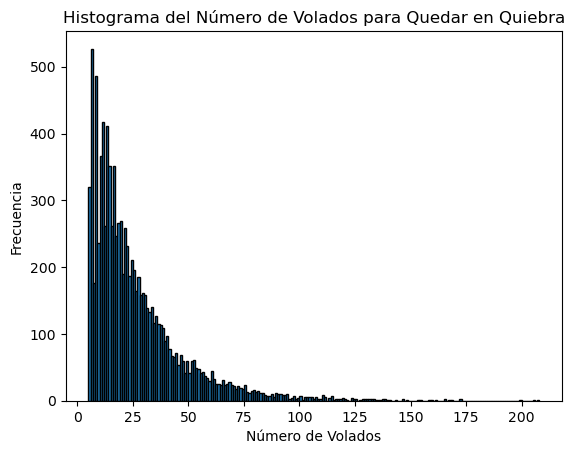

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

def realizar_apuesta(capital):
    if capital >= 6:
        apuesta = capital / 2
    else:
        apuesta = 2
    resultado_volado = random.randint(0, 1)  # 0 representa cara, 1 representa cruz
    if resultado_volado == 0:
        return apuesta
    else:
        return -apuesta

def simulacion_apuestas(capital_inicial):
    capital = capital_inicial
    volados = 0
    while capital > 0:
        apuesta = realizar_apuesta(capital)
        capital += apuesta
        volados += 1
    return volados

# 1. Graficar la evolución del capital hasta quedar en cero
def graficar_evolucion_capital(capital_inicial):
    capital = capital_inicial
    evolucion_capital = [capital]
    while capital > 0:
        apuesta = realizar_apuesta(capital)
        capital += apuesta
        evolucion_capital.append(capital)
    plt.plot(evolucion_capital)
    plt.xlabel('Número de Volados')
    plt.ylabel('Capital')
    plt.title('Evolución del Capital en las Apuestas')
    plt.show()

# 2. Determinar el número de volados promedio para quedar en quiebra usando simulación Montecarlo para 10,000 apostadores
num_apostadores = 10000
volados_promedio = np.mean([simulacion_apuestas(20) for _ in range(num_apostadores)])
print(f'Número promedio de volados para quedar en quiebra: {volados_promedio:.2f}')

# 3. Mostrar un histograma del número de volados
resultados = [simulacion_apuestas(20) for _ in range(num_apostadores)]
plt.hist(resultados, bins=range(min(resultados), max(resultados) + 1, 1), edgecolor='black')
plt.xlabel('Número de Volados')
plt.ylabel('Frecuencia')
plt.title('Histograma del Número de Volados para Quedar en Quiebra')
plt.show()
